<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2006%20-%20Boundary%20Value%20Problems/603_Boundary%20Value%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Difference Method
#### John S Butler john.s.butler@tudublin.ie 
[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    
[Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
This notebook illustrates the finite different method for a linear Boundary Value Problem.
The video below walks through the code.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/DMtnJ7vrb8s" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/johnbutler/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Introduction
To numerically approximate a linear Boundary Value Problem
\begin{equation}
y^{''}=f(x,y,y^{'}), \ \ \ a < x < b, \end{equation}
with the boundary conditions
\begin{equation}y(a)=\alpha,\end{equation} and
\begin{equation}y(b) =\beta,\end{equation}
is dicretised to a system of difference equations.
the first derivative can be approximated by the difference operators:
\begin{equation} D^{+}U_{i}=\frac{U_{i+1}-U_{i}}{h_{i+1}} \ \ \ \mbox{ Forward,} \end{equation}
\begin{equation} D^{-}U_{i}=\frac{U_{i}-U_{i-1}}{h_i} \ \ \ \mbox{ Backward,} \end{equation}
or
\begin{equation}D^{0}U_{i}=\frac{U_{i+1}-U_{i-1}}{x_{i+1}-x_{i-1}}=\frac{U_{i+1}-U_{i-1}}{2h} \ \ \ \mbox{ Centered.} \end{equation}
The second derivative can be approximated by:
\begin{equation}\delta_x^{2}U_{i}=\frac{2}{x_{i+1}-x_{i-1}}\left(\frac{U_{i+1}-U_{i}}{x_{i+1}-x_{i}}-\frac{U_{i}-U_{i-1}}{x_{i}-x_{i-1}}\right)=\frac{U_{i+1}-2U_{2}+U_{i-1}}{h^2} \ \ \ \mbox{ Centered in $x$ direction}. \end{equation}

### Example Boundary Value Problem
To illustrate the method we will apply the finite difference method to the this boundary value problem
\begin{equation}  \frac{d^2 y}{dx^2} = 4y,\end{equation}
with the boundary conditions
\begin{equation} y(0)=1.1752,  y(1)=10.0179. \end{equation}

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Discrete Axis
The stepsize is defined as
\begin{equation}h=\frac{b-a}{N}\end{equation}
here it is 
\begin{equation}h=\frac{1-0}{10}\end{equation}
giving 
\begin{equation}x_i=0+0.1 i\end{equation}
for $i=0,1,...10.$

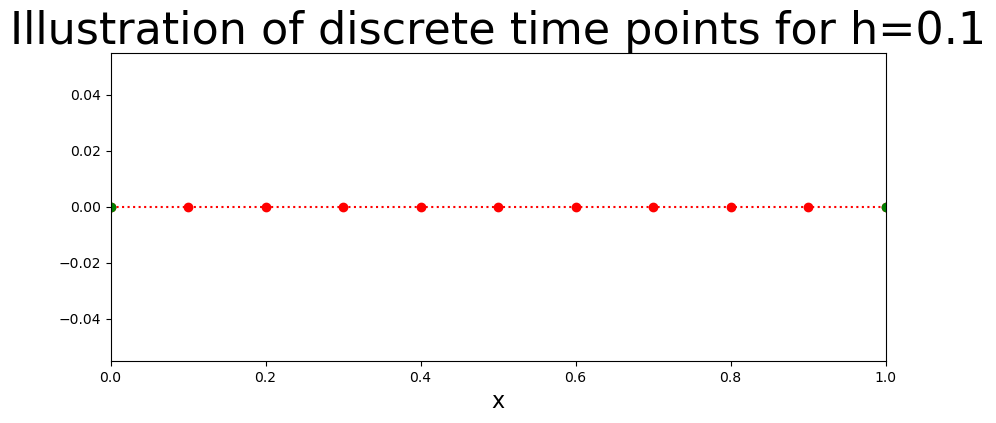

In [3]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.plot(x[0],0,'o:',color='green')
plt.plot(x[10],0,'o:',color='green')


plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=32)
plt.show()

## The Difference Equation
To convert the boundary problem into a difference equation we use 1st and 2nd order difference operators.
The general difference equation is
\begin{equation} \frac{1}{h^2}\left(y_{i-1}-2y_i+y_{i+1}\right)=4y_i \ \ \ i=1,..,N-1. \end{equation}

Rearranging the equation we have the system of N-1 equations
\begin{equation}i=1: \frac{1}{0.1^2}\color{green}{y_{0}} -\left(\frac{2}{0.1^2}+4\right)y_1 +\frac{1}{0.1^2} y_{2}=0\end{equation}
\begin{equation}i=2: \frac{1}{0.1^2}y_{1} -\left(\frac{2}{0.1^2}+4\right)y_2 +\frac{1}{0.1^2} y_{3}=0\end{equation}
\begin{equation} ...\end{equation}
\begin{equation}i=8: \frac{1}{0.1^2}y_{7} -\left(\frac{2}{0.1^2}+4\right)y_8 +\frac{1}{0.1^2} y_{9}=0\end{equation}
\begin{equation}i=9: \frac{1}{0.1^2}y_{8} -\left(\frac{2}{0.1^2}+4\right)y_9 +\frac{1}{0.1^2} \color{green}{y_{10}}=0\end{equation}
where the green terms are the known boundary conditions.

Rearranging the equation we have the system of 9 equations
\begin{equation}i=1:  -\left(\frac{2}{0.1^2}+4\right)y_1 +\frac{1}{0.1^2} y_{2}=-\frac{1}{0.1^2}\color{green}{y_{0}}\end{equation}
\begin{equation}i=2: \frac{1}{0.1^2}y_{1} -\left(\frac{2}{0.1^2}+4\right)y_2 +\frac{1}{0.1^2} y_{3}=0\end{equation}
\begin{equation} ...\end{equation}
\begin{equation}i=8: \frac{1}{0.1^2}y_{7} -\left(\frac{2}{0.1^2}+4\right)y_8 +\frac{1}{0.1^2} y_{9}=0\end{equation}
\begin{equation}i=9: \frac{1}{0.1^2}y_{8} -\left(\frac{2}{0.1^2}+4\right)y_9 =-\frac{1}{0.1^2} \color{green}{y_{10}}\end{equation}
where the green terms are the known boundary conditions.
This is system can be put into matrix form 
\begin{equation}  A\color{red}{\mathbf{y}}=\mathbf{b} \end{equation}
Where A is a $9\times 9 $ matrix of the form
\begin{equation}
A=\left(\begin{array}{ccc ccc ccc} 
-204&100&0& 0&0&0& 0&0&0\\
100&-204&100 &0&0&0& 0&0&0\\
0&100&-204& 100&0&0& 0&0&0\\
.&.&.& .&.&.& .&.&.\\
.&.&.& .&.&.& .&.&.\\
0&0&0& 0&0&0& 100&-204&100\\
0&0&0& 0&0&0& 0&100&-204
\end{array}\right)
\end{equation}
which can be represented graphically as:

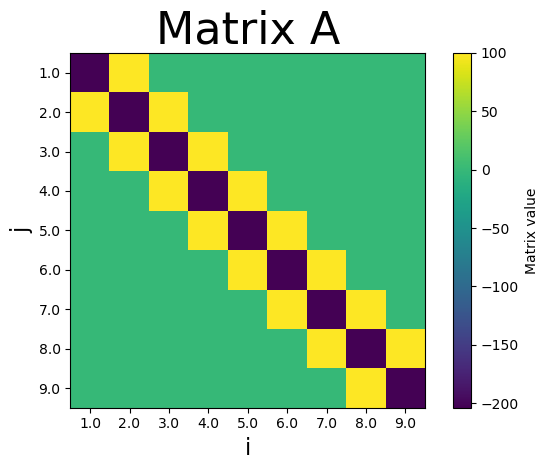

In [4]:
A=np.zeros((N-1,N-1))
# Diagonal
for i in range (0,N-1):
    A[i,i]=-(2/(h*h)+4)

for i in range (0,N-2):           
    A[i+1,i]=1/(h*h)
    A[i,i+1]=1/(h*h)
    
plt.imshow(A)
plt.xlabel('i',fontsize=16)
plt.ylabel('j',fontsize=16)
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
plt.title('Matrix A',fontsize=32)
plt.tight_layout()
plt.subplots_adjust()
plt.show()

$\mathbf{y}$ is the unknown vector which is contains the numerical approximations of the $y$. 
$$
\color{red}{\mathbf{y}}=\color{red}{
\left(\begin{array}{c} y_1\\
y_2\\
y_3\\
.\\
.\\
y_8\\
y_9
\end{array}\right).}
\end{equation}

In [5]:
y=np.zeros((N+1))
# Boundary Condition
y[0]=1.1752
y[N]=10.0179

and the known right hand side is a known $9\times 1$ vector with the boundary conditions
\begin{equation}
\mathbf{b}=\left(\begin{array}{c}-117.52\\
0\\
0\\
.\\
.\\
0\\
-1001.79 \end{array}\right)
\end{equation}


In [6]:
b=np.zeros(N-1)

# Boundary Condition
b[0]=-y[0]/(h*h)
b[N-2]=-y[N]/(h*h)


## Solving the system
To solve invert the matrix $A$ such that 
\begin{equation}A^{-1}Ay=A^{-1}b\end{equation}
\begin{equation}y=A^{-1}b\end{equation}
The plot below shows the graphical representation of $A^{-1}$.

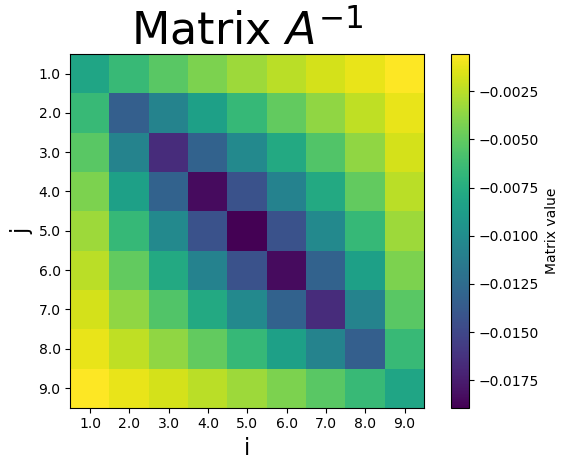

In [7]:
invA=np.linalg.inv(A)

plt.imshow(invA)
plt.xlabel('i',fontsize=16)
plt.ylabel('j',fontsize=16)
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
plt.title(r'Matrix $A^{-1}$',fontsize=32)
plt.tight_layout()
plt.subplots_adjust()
plt.show()


y[1:N]=np.dot(invA,b)

## Result 
The plot below shows the approximate solution of the Boundary Value Problem (blue v) and the exact solution (black dashed line).

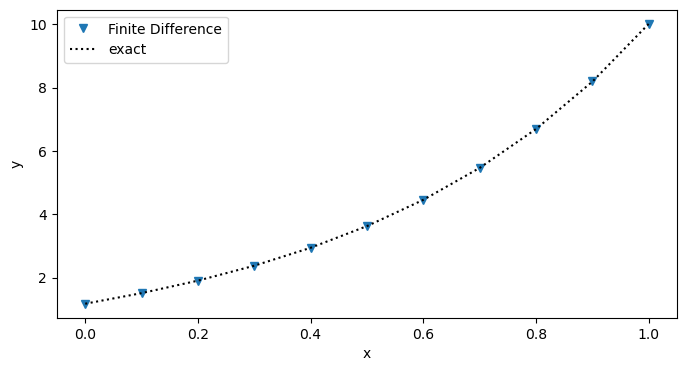

In [8]:
fig = plt.figure(figsize=(8,4))

plt.plot(x,y,'v',label='Finite Difference')
plt.plot(x,np.sinh(2*x+1),'k:',label='exact')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()